In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
np.__version__  # if not 1.x run uv pip install --system numpy==1.26.4

'1.26.4'

In [3]:
import pathlib

data_path = pathlib.Path('../data/MELBOURNE_HOUSE_PRICES_LESS.csv')

data_path.is_file()

True

# EDA

## Loading data

In [4]:
housing = pd.read_csv(data_path)
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [5]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

## Checking out the median, mean and std

In [6]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


## are there null values

In [7]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [8]:
shape_before = housing.shape
housing = housing[housing['Price'].notnull()]
shape_before, housing.shape

((63023, 13), (48433, 13))

In [9]:
housing.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


## Spliting price into bins

/tmp/ipykernel_1984/4113492149.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=housing['PriceRange'], palette='Set2')


<Axes: xlabel='PriceRange', ylabel='Count'>

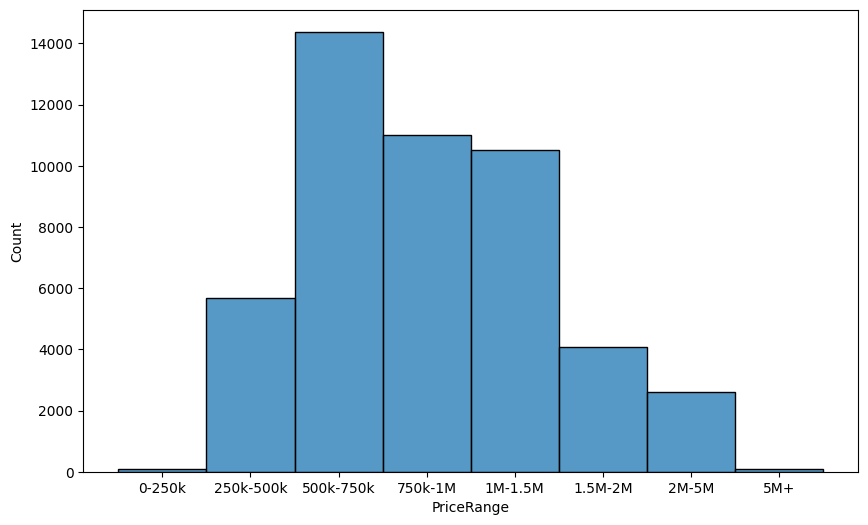

In [13]:
price_bins = [0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 5000000, 11500000]
price_labels = ['0-250k', '250k-500k', '500k-750k', '750k-1M', '1M-1.5M', '1.5M-2M', '2M-5M', '5M+']

housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
plt.figure(figsize=(10, 6))
sns.histplot(x=housing['PriceRange'], palette='Set2')

/tmp/ipykernel_1984/2395519943.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=housing['PriceRange'], palette='Set2')


<Axes: xlabel='PriceRange', ylabel='Count'>

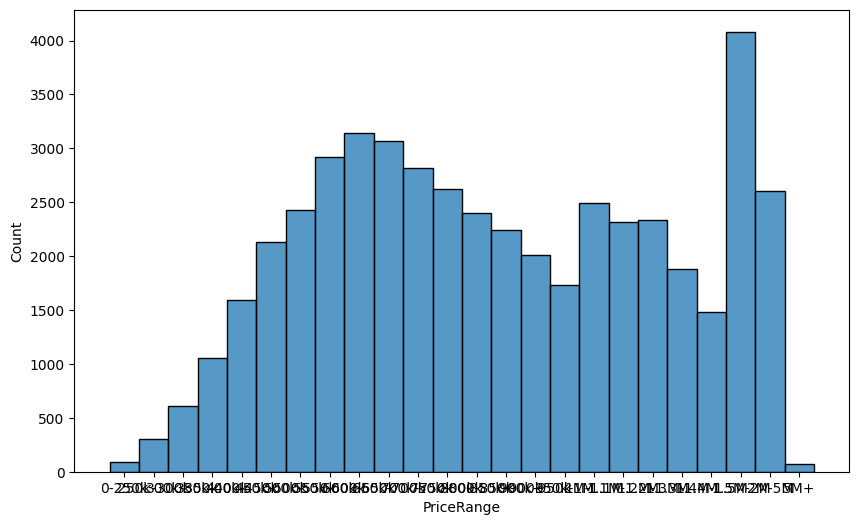

In [12]:
# price_bins = [0, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 2000000, 5000000, 11500000]
# price_labels = ['0-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-550k', '550k-600k', '600k-650k', '650k-700k', '700k-750k', '750k-800k', '800k-850k', '850k-900k', '900k-950k', '950k-1M', '1M-1.1M', '1.1M-1.2M', '1.2M-1.3M', '1.3M-1.4M', '1.4M-1.5M', '1.5M-2M', '2M-5M', '5M+']

# housing.loc[:, 'PriceRange'] = pd.cut(housing['Price'], bins=price_bins, labels=price_labels, include_lowest=True)
# plt.figure(figsize=(10, 6))
# sns.histplot(x=housing['PriceRange'], palette='Set2')